# いよいよ魔円陣

In [1]:
println(versioninfo())
using Nemo,Plots,LaTeXStrings,Latexify,Combinatorics

Julia Version 1.10.4
Commit 48d4fd48430 (2024-06-04 10:41 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: macOS (arm64-apple-darwin22.4.0)
  CPU: 8 × Apple M3
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, apple-m1)
Threads: 1 default, 0 interactive, 1 GC (on 4 virtual cores)
nothing

Welcome to Nemo version building

Nemo comes with absolutely no warranty whatsoever


#### 魔円陣は, 素数 $p$ の累乗 $p^n$ に対して, $p^n+1$ 個のビリヤード問題( $1$ から $(p^n)^2+p^n+1$ までが和として得られる)として成立する。
#### 例えば, $p=2,\ n=2$ であれば, $p^n+1=4+1=5$ 個のビリヤード問題で, 隣り合う数の和は $1$ から $4^2+4+1=21$ までとなる。
#### このビリヤード問題の解をどのようにして得るか。

In [2]:
p,n=2,4
Fpn,α=finite_field(p,n,"α")
println(defining_polynomial(Fpn),", ",length(Fpn))
for i=1:p^n-1
    print(α^(i-1),", ")
end

x^4 + x + 1, 16
1, α, α^2, α^3, α + 1, α^2 + α, α^3 + α^2, α^3 + α + 1, α^2 + 1, α^3 + α, α^2 + α + 1, α^3 + α^2 + α, α^3 + α^2 + α + 1, α^3 + α^2 + 1, α^3 + 1, 

In [3]:
Fpnl3=[]
for x ∈ Fpn,y ∈ Fpn,z ∈ Fpn
    push!(Fpnl3,[x,y,z])
end
pn=p^n
println("p^n=",pn,", (p^n)^3=",pn^3,", (p^n)^2+p^n+1=",pn^2+pn+1,", (p^n)^2-1=",pn^2-1)
println("点の数は, ",length(Fpnl3))
#for x ∈ Fpnl3
#    println("(",join(x,", "),")")
#end
# Fpnl3 を有限射影平面とみた時の「原点を通る平面」を列挙して, それら平面の配列 Fpnl3p を用意する。
Fpnl3p=[]
for x ∈ Fpnl3
    a,b,c=x[1],x[2],x[3]
    ln=[]
    for p ∈ Fpnl3
# 「原点を通る平面」は, ax+by+cz=0 を満たす点の集合とする。
# ここで, a,b,c は当然 Fpn の元であり, 3つ組みなので, Fpnl3 にその全ての組み合わせがあるわけだ。
        if a*p[1]+b*p[2]+c*p[3]==0
            if p !=[0,0,0]
                push!(ln,p)
            end
        end
    end
# 当然だけど重複するものは省く
    if x!=[0,0,0] && !(ln ∈ Fpnl3p)
        push!(Fpnl3p,ln)
    end
end
println("巡回平面の数は, ",length(Fpnl3p))
#for x ∈ Fpnl3p
#    for i=1:length(x)
#        print("(",join(x[i],","),"), ")
#    end
#    print("\n")
#end

p^n=16, (p^n)^3=4096, (p^n)^2+p^n+1=273, (p^n)^2-1=255
点の数は, 4096
巡回平面の数は, 273


In [9]:
Fpnr,y=polynomial_ring(Fpn, "y")
f(y)=y^3 + y^2 + y + α
f(y)=y^3 + y + α
f(y)=y^3 + α*y + 1
f(y)=y^3 + α*y + α
#FFpn,ω=finite_field(y^3+y^2+y+α,"ω")
#FFpn,ω=finite_field(y^3+y^2+2y+α,"ω")
#FFpn,ω=finite_field(y^3 + α*y^2 + α*y + 2*α + 1,"ω")
#FFpn,ω=finite_field(y^3 + y^2 + y + α,"ω")
FFpn,ω=finite_field(f(y),"ω")
println(FFpn,", ",length(FFpn))
ansl=[0]
for i=1:length(Fpnl3p)
#    println(ω^i)
    if coeff(ω^i,2)==0
        push!(ansl,i)
    end
end
println(join(ansl,","))
bill=[]
for i=1:length(ansl)-1
    push!(bill,ansl[i+1]-ansl[i])
end
println(join(bill,","))
bl=length(bill)
bs=[]
for i=1:bl
    for j=1:bl-1
        sum=0
        for k=i:i+j-1
#            print(bill[(k-1)%bl+1],"+")
            sum=sum+bill[(k-1)%bl+1]
        end
#        print("\n")
        push!(bs,sum)
        #println(sum)
    end
end
summ=0
for i=1:bl
    summ=summ+bill[i]
end
push!(bs,summ)
#println(join(sort(bs),", "))
println(length(bs))

Finite field of degree 3 over Fpn, 4096
0,1,3,7,15,31,63,90,116,127,136,181,194,204,233,238,255,273
1,2,4,8,16,32,27,26,11,9,45,13,10,29,5,17,18
273


#### 上手くいっているように見えるかもしれないが, $p,\ n$ を変えると,  **finite_field()** で用いる3次の既約多項式が問題になる。
#### $p,\ n$ によって既約多項式の候補が変わるので, ちゃんとプログラムで求めないと...
#### 3次の既約多項式だから, 3次式を逐一調べれば良い。
#### それぞれに $\alpha^i$ を代入して $0$ にならなければ... 

In [7]:
flst=[]
for a=0:p^n,b=0:p^n,c=0:p^n
#for a=0:1,b=0:p^n,c=0:p^n
    if a==0 
        A=0 
    else 
        A=α^(a-1) 
    end
    if b==0
        B=0 
    else 
        B=α^(b-1)
    end
    if c==0
        C=0 
    else 
        C=α^(c-1) 
    end
    f(y)=y^3+A*y^2+B*y+C
    for i=1:p^n-1
        if f(α^(i-1))==0
#        println("*** Out *** ",i)
            break
        end
        if i==p^n-1 && f(0)!=0
            if !(f(y) ∈ flst)
                push!(flst,f(y))
#            println(f(y))
            end
        end
    end
end
for f ∈ flst
    println(f)
end
println(length(flst))

y^3 + α
y^3 + α^2
y^3 + α + 1
y^3 + α^2 + α
y^3 + α^3 + α + 1
y^3 + α^2 + 1
y^3 + α^2 + α + 1
y^3 + α^3 + α^2 + α
y^3 + α^3 + α^2 + 1
y^3 + α^3 + 1
y^3 + y + 1
y^3 + y + α^3 + α + 1
y^3 + y + α^3 + α^2 + α
y^3 + y + α^3 + α^2 + 1
y^3 + y + α^3 + 1
y^3 + α*y + α
y^3 + α*y + α^2 + α
y^3 + α*y + α^3 + α + 1
y^3 + α*y + α^2 + 1
y^3 + α*y + α^3 + α
y^3 + α^2*y + α
y^3 + α^2*y + α^2
y^3 + α^2*y + α^3
y^3 + α^2*y + α^2 + α + 1
y^3 + α^2*y + α^3 + 1
y^3 + α^3*y + α + 1
y^3 + α^3*y + α^2 + 1
y^3 + α^3*y + α^2 + α + 1
y^3 + α^3*y + α^3 + α^2 + α
y^3 + α^3*y + α^3 + α^2 + α + 1
y^3 + (α + 1)*y + α^2
y^3 + (α + 1)*y + α + 1
y^3 + (α + 1)*y + α^2 + α
y^3 + (α + 1)*y + α^3 + α^2
y^3 + (α + 1)*y + α^3 + α^2 + 1
y^3 + (α^2 + α)*y + 1
y^3 + (α^2 + α)*y + α^3 + α + 1
y^3 + (α^2 + α)*y + α^3 + α^2 + α
y^3 + (α^2 + α)*y + α^3 + α^2 + 1
y^3 + (α^2 + α)*y + α^3 + 1
y^3 + (α^3 + α^2)*y + α
y^3 + (α^3 + α^2)*y + α^2 + α
y^3 + (α^3 + α^2)*y + α^3 + α + 1
y^3 + (α^3 + α^2)*y + α^2 + 1
y^3 + (α^3 + α^2)*y + α^3 

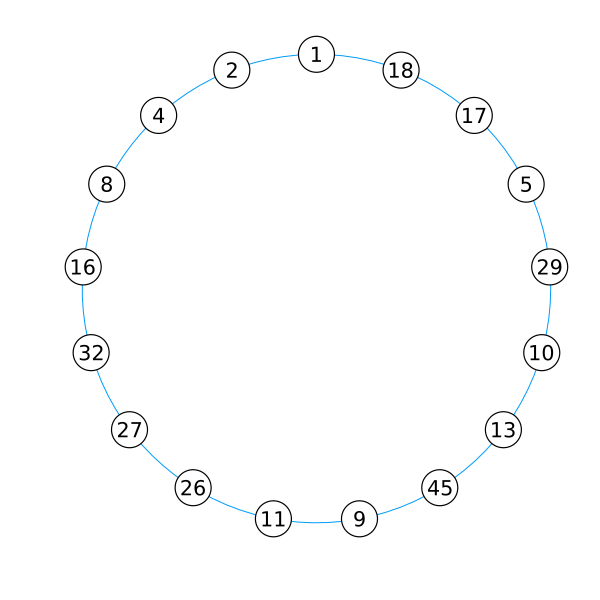

In [10]:
function draw_circles_on_circumference(n::Int, R::Float64, r::Float64, labels::Vector{String})
    theta = 2 * π / n  # 角度の増分
    x_coords = [R * cos(i * theta+π/2) for i in 0:n-1]  # x,y座標
    y_coords = [R * sin(i * theta+π/2) for i in 0:n-1]
    p = plot(legend=false, aspect_ratio=:equal,size=(600,400),xlims=(-R-4r, R+4r), ylims=(-R-4r, R+4r), framestyle=:none, grid=false, axis=false)
    # 大きな円の描画
    circle_x = [R * cos(t) for t in range(0, stop=2π, length=100)]
    circle_y = [R * sin(t) for t in range(0, stop=2π, length=100)]
    plot!(p, circle_x, circle_y, line=:solid)
    # 小さな円の描画
    for (i, (x, y)) in enumerate(zip(x_coords, y_coords))
        scatter!(p, [x], [y], markershape=:circle, markersize=20, color=:white, label=false)
        annotate!(p, x, y, text(labels[i], :center, 14, :black))
    end
    return p
end
n = length(bill)         # 小さな円の数
R = 10.0      # 大きな円の半径
r = 0.4       # 小さな円の半径
labels=[]
push!(labels,string.(bill))  # ラベルの配列
plots = [draw_circles_on_circumference(n, R, r, labels[1])]
plot(plots..., layout=(1, 1), size=(600, 600))
